# 🧪 Data Analytics – Product Recommendation Dataset

This notebook performs **EDA** on the project dataset:
- Load data
- Inspect schema & missing values
- Clean price → numeric
- Visualize categories, brands, price distribution


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")


In [2]:
CSV_PATH = '../Backend/data/intern_data_ikarus.csv'  # adjust if needed
print("Loading:", os.path.abspath(CSV_PATH))
df = pd.read_csv(CSV_PATH)
df.head()


Loading: d:\ml-product-app\Backend\data\intern_data_ikarus.csv


title            brand  \
0  GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...           GOYMFK   
1  subrtex Leather ding Room, Dining Chairs Set o...          subrtex   
2  Plant Repotting Mat MUYETOL Waterproof Transpl...          MUYETOL   
3  Pickleball Doormat, Welcome Doormat Absorbent ...          VEWETOL   
4  JOIN IRON Foldable TV Trays for Eating Set of ...  JOIN IRON Store   

                                         description   price  \
0  multiple shoes, coats, hats, and other items E...  $24.99   
1                     subrtex Dining chairs Set of 2     NaN   
2                                                NaN   $5.98   
3  The decorative doormat features a subtle textu...  $13.99   
4  Set of Four Folding Trays With Matching Storag...  $89.99   

                                          categories  \
0  ['Home & Kitchen', 'Storage & Organization', '...   
1  ['Home & Kitchen', 'Furniture', 'Dining Room F...   
2  ['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...   
3  ['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...   
4  ['Home & Kitchen', 'Furniture', 'Game & Recrea...   

                                              images           manufacturer  \
0  ['https://m.media-amazon.com/images/I/416WaLx1...                 GOYMFK   
1  ['https://m.media-amazon.com/images/I/31SejUEW...  Subrtex Houseware INC   
2  ['https://m.media-amazon.com/images/I/41RgefVq...                MUYETOL   
3  ['https://m.media-amazon.com/images/I/61vz1Igl...              Contrence   
4  ['https://m.media-amazon.com/images/I/41p4d4VJ...                    NaN   

         package_dimensions country_of_origin      material          color  \
0  2.36"D x 7.87"W x 21.6"H             China         Metal          White   
1      18.5"D x 16"W x 35"H               NaN        Sponge          Black   
2           26.8"L x 26.8"W               NaN  Polyethylene          Green   
3               24"L x 16"W               NaN        Rubber          A5589   
4    18.9"D x 14.2"W x 26"H               NaN          Iron  Grey Set of 4   

                                uniq_id  
0  02593e81-5c09-5069-8516-b0b29f439ded  
1  5938d217-b8c5-5d3e-b1cf-e28e340f292e  
2  b2ede786-3f51-5a45-9a5b-bcf856958cd8  
3  8fd9377b-cfa6-5f10-835c-6b8eca2816b5  
4  bdc9aa30-9439-50dc-8e89-213ea211d66a

In [3]:
print('Shape:', df.shape)
print('\nColumns:', list(df.columns))
print('\nDtypes:\n', df.dtypes)


Shape: (312, 12)

Columns: ['title', 'brand', 'description', 'price', 'categories', 'images', 'manufacturer', 'package_dimensions', 'country_of_origin', 'material', 'color', 'uniq_id']

Dtypes:
 title                 object
brand                 object
description           object
price                 object
categories            object
images                object
manufacturer          object
package_dimensions    object
country_of_origin     object
material              object
color                 object
uniq_id               object
dtype: object


### 🔍 Missing values


In [4]:
df.isnull().sum().sort_values(ascending=False)


country_of_origin     187
description           153
manufacturer          107
price                  97
material               94
color                  47
package_dimensions      6
brand                   0
title                   0
images                  0
categories              0
uniq_id                 0
dtype: int64

In [5]:
### 💲 Price cleaning → numeric
if 'price' in df.columns:
    price_raw = (
        df['price'].astype(str)
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
    )
    df['price_clean'] = pd.to_numeric(price_raw, errors='coerce')
else:
    df['price_clean'] = np.nan

df[['price', 'price_clean']].head()


price  price_clean
0  $24.99        24.99
1     NaN          NaN
2   $5.98         5.98
3  $13.99        13.99
4  $89.99        89.99

In [6]:
### 📊 Price statistics
df['price_clean'].describe()


count    215.000000
mean      67.630651
std       57.962150
min        0.600000
25%       24.990000
50%       53.990000
75%       89.990000
max      349.000000
Name: price_clean, dtype: float64

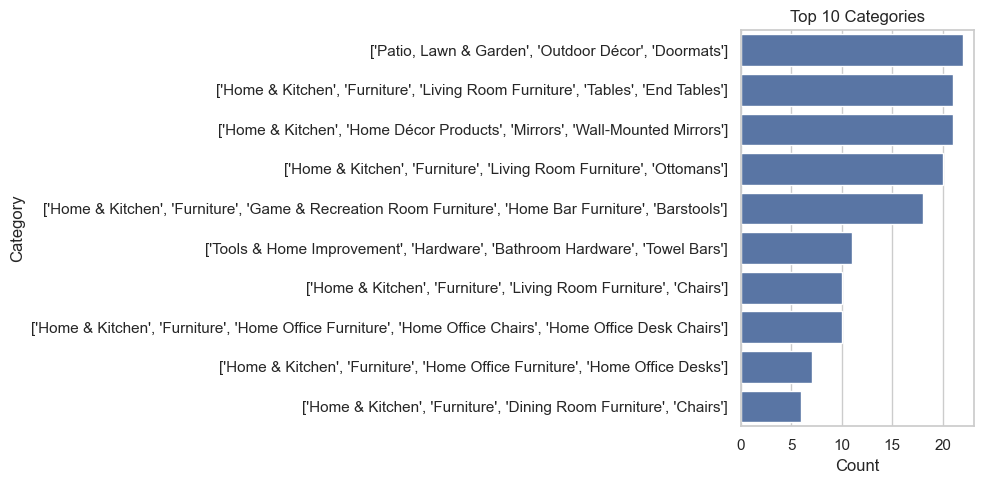

In [7]:
### 🗂 Top product categories (as stored)
if 'categories' in df.columns:
    cats = df['categories'].astype(str)
    top_cats = cats.value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_cats.values, y=top_cats.index)
    plt.title('Top 10 Categories')
    plt.xlabel('Count'); plt.ylabel('Category')
    plt.tight_layout(); plt.show()
else:
    print("No 'categories' column.")


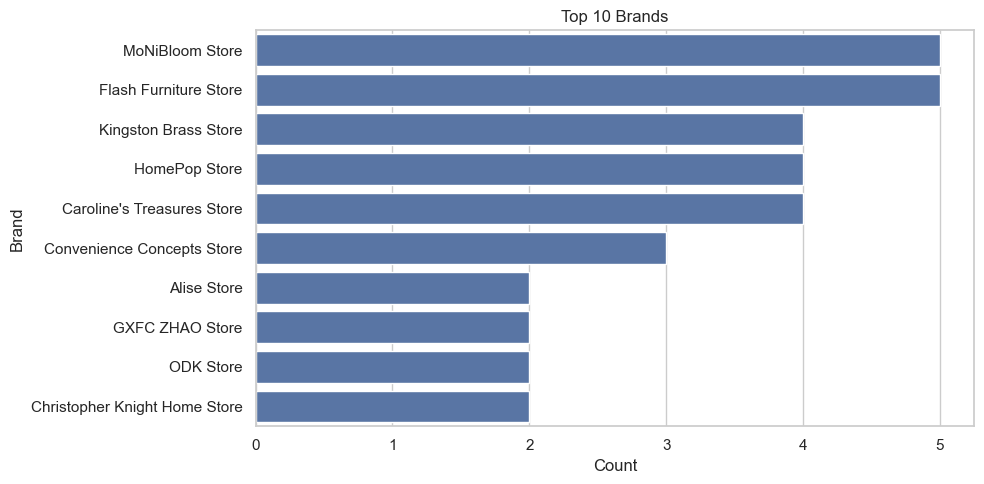

In [8]:
### 🏷 Top brands
if 'brand' in df.columns:
    brands = df['brand'].astype(str).replace({'nan': np.nan}).dropna()
    top_brands = brands.value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_brands.values, y=top_brands.index)
    plt.title('Top 10 Brands')
    plt.xlabel('Count'); plt.ylabel('Brand')
    plt.tight_layout(); plt.show()
else:
    print("No 'brand' column.")


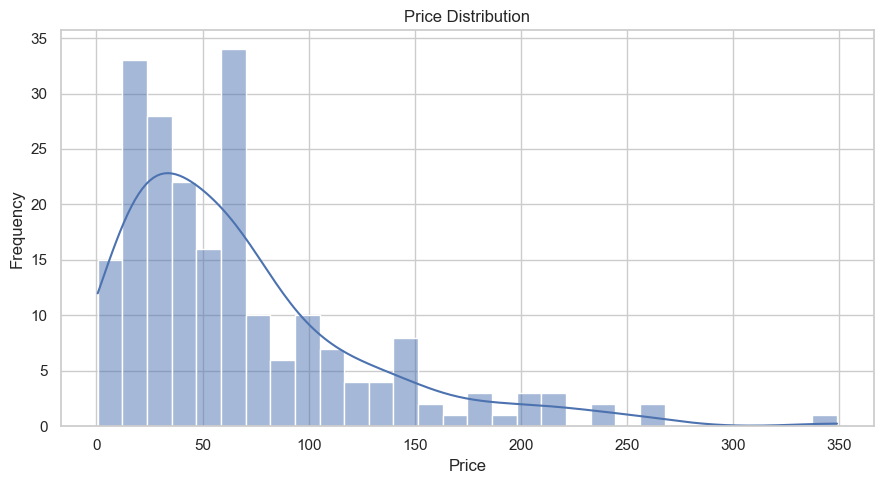

In [9]:
### 📉 Price distribution
plt.figure(figsize=(9,5))
sns.histplot(df['price_clean'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price'); plt.ylabel('Frequency')
plt.tight_layout(); plt.show()
